In [4]:
import os
import json
os.chdir('C:\\Users\\Romina\\Desktop\\thesis')

import datetime as dt
from datetime import datetime, date
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline
import matplotlib.pyplot as plt


In [6]:
os.getcwd()
#data_5.info()

'C:\\Users\\Romina\\Desktop\\thesis'

In [10]:
data_5=pd.read_csv("clusteringdata-session30.csv")

data_5=data_5[(data_5['no_vocab']<51)& (data_5['session_len_s']<60)
             & (data_5['no_word']<151) &
               (data_5['q']<21)]

# # #data_5.info()
# data_5.to_csv("data_5.csv")

#data_5=pd.read_csv("clusteringdata.csv")
#remove outliers:

#data_5=data_5[(data_5['session_len_s']<600)]


#get the sessions with clicks only for clustering
data_5=data_5[data_5['portal_view']>0]

data_5['v_w_ratio']=data_5['no_vocab']/data_5['no_word']
data_5['q_len_ave']=data_5['no_word']/data_5['q']
data_5['browse_q_ratio']=data_5['portal_view']/data_5['q']

data_5.describe()
data_5['session_len_s'].mean()

4.318250563713334

In [11]:
data_5.info()
# from scipy.stats import pearsonr
# corr1= pearsonr(data_5['q_len_ave'], data_5['no_vocab'])
# print(corr1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12122 entries, 0 to 14375
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       12122 non-null  int64  
 1   session_no       12122 non-null  int64  
 2   portal_search    12122 non-null  float64
 3   portal_view      12122 non-null  float64
 4   portal_accessed  12122 non-null  float64
 5   portal_export    12122 non-null  float64
 6   DOMAINNAME_g     12119 non-null  object 
 7   time             12122 non-null  object 
 8   time_finish      12122 non-null  object 
 9   q                12122 non-null  int64  
 10  no_vocab         12122 non-null  int64  
 11  no_word          12122 non-null  int64  
 12  session_type     12122 non-null  object 
 13  session_len      12122 non-null  object 
 14  session_len_s    12122 non-null  float64
 15  ARDC             12122 non-null  int64  
 16  Browse_other     12122 non-null  int64  
 17  Search_engin

<Figure size 720x576 with 0 Axes>

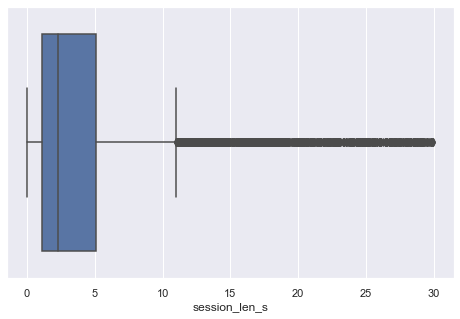

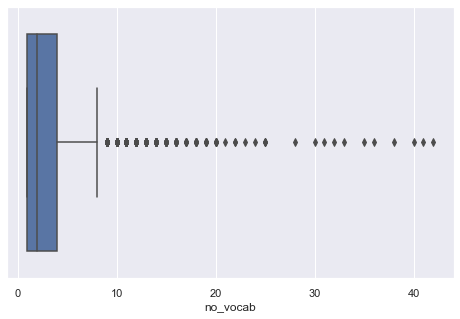

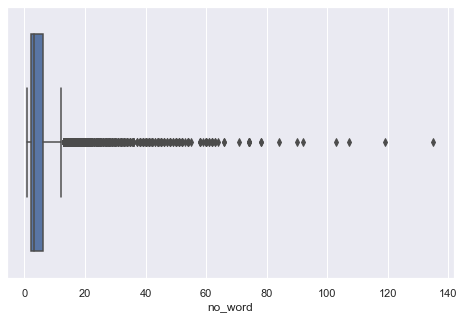

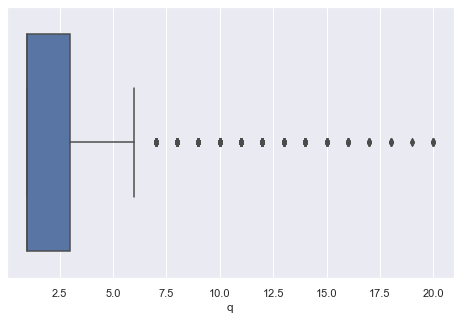

In [12]:
plt.figure(figsize=(10,8))

plt.figure(figsize=(8,5))
ax=sns.boxplot(data_5['session_len_s'])


plt.figure(figsize=(8,5))
ax=sns.boxplot(x=data_5['no_vocab'])

plt.figure(figsize=(8,5))
ax=sns.boxplot(x=data_5['no_word'])

plt.figure(figsize=(8,5))
ax=sns.boxplot(x=data_5['q'])




# this section tries the new features with Hierarchical clustering

In [53]:
distances=pd.read_csv("distances_session30-normalised.csv")
distances.head()
distances_g=distances.groupby('session_no')[['distance_0']].mean().reset_index()
distances_g


,session_no,distance_0
0,172,0.000000
1,177,0.000000
2,227,inf
3,251,1.003270
4,274,1.169803
...,...,...
9782,292359,inf
9783,292413,1.337738
9784,292455,inf
9785,292566,inf


In [54]:
data_5_=pd.merge(data_5, distances_g[['session_no', 'distance_0']], right_on='session_no', left_on='session_no', how='left')
data_5_.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12122 entries, 0 to 12121
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       12122 non-null  int64  
 1   session_no       12122 non-null  int64  
 2   portal_search    12122 non-null  float64
 3   portal_view      12122 non-null  float64
 4   portal_accessed  12122 non-null  float64
 5   portal_export    12122 non-null  float64
 6   DOMAINNAME_g     12119 non-null  object 
 7   time             12122 non-null  object 
 8   time_finish      12122 non-null  object 
 9   q                12122 non-null  int64  
 10  no_vocab         12122 non-null  int64  
 11  no_word          12122 non-null  int64  
 12  session_type     12122 non-null  object 
 13  session_len      12122 non-null  object 
 14  session_len_s    12122 non-null  float64
 15  ARDC             12122 non-null  int64  
 16  Browse_other     12122 non-null  int64  
 17  Search_engin

In [55]:
#remove the cases with zero distance
data_5_=data_5_[data_5_['distance_0']!=0]

data_55=data_5_[[#'portal_search', 
                    'portal_view', 
              # 'portal_accessed', 'portal_export', 
                 'q', 
    'no_vocab', 
    #'no_word', 
    #'w_v_ratio',
    'q_len_ave',
    'session_len_s'
    #,'ARDC','Browse_other','Search_engine'
]]

#data_55=data_55[data_55['portal_view']>0]
#data_55.head()

#remove the cases with zero distance


data_55.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11965 entries, 0 to 12121
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   portal_view    11965 non-null  float64
 1   q              11965 non-null  int64  
 2   no_vocab       11965 non-null  int64  
 3   q_len_ave      11965 non-null  float64
 4   session_len_s  11965 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 560.9 KB


In [56]:
from sklearn.preprocessing import StandardScaler

# data_55[['portal_view', 'q', 'no_vocab', 'no_word','session_len_s'
#            ,'ARDC','Browse_other','Search_engine' 
#         ]] = StandardScaler().fit_transform(data_55[['portal_view', 'q', 'no_vocab', 'no_word','session_len_s'
#                                                          ,'ARDC','Browse_other','Search_engine'
#                                                     ]])

X= StandardScaler().fit_transform(data_55)

In [57]:
#data_5_gower1=data_white

#data_55_gower2=data_55['session_type']
print(X)

[[-0.29184254 -0.5788522  -0.76031837 -0.70778901 -0.65227434]
 [ 3.60590664  0.31366927 -0.76031837 -0.70778901  3.77064272]
 [ 0.1953761   1.65245147  2.44419373  0.28585714  2.74184051]
 ...
 [-0.77906119 -0.5788522  -0.76031837 -0.70778901 -0.70511313]
 [ 0.1953761  -0.13259147  0.04080966  0.3761886   0.13719926]
 [-0.77906119 -0.5788522   1.6430657   2.54414384 -0.18915794]]


In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

# generate the linkage matrix
#dist_matrix = pdist(gower_dis)

Z = linkage(X, 'ward')



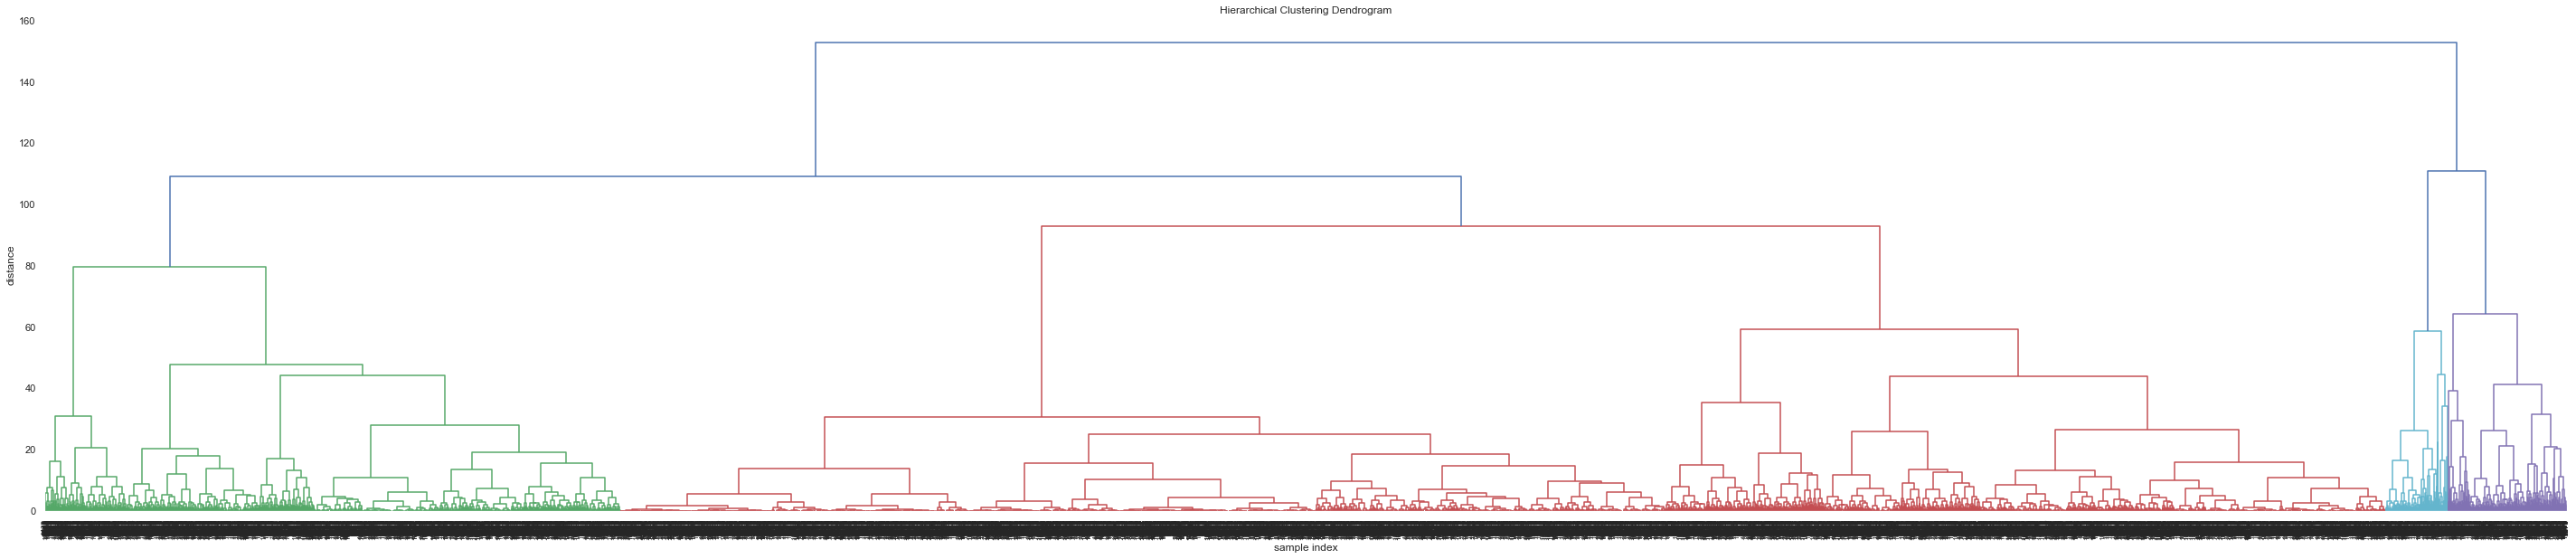

In [20]:
plt.figure(figsize=(50, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance') 
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [21]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
print('Cophenet Correlation:',c)

Cophenet Correlation: 0.6057836265972584


In [75]:
# from sklearn.metrics import silhouette_samples, silhouette_score

# range_n_clusters = [3, 4, 5]


# for n in range_n_clusters:
#     # Create a subplot with 1 row and 2 columns
#     clusterer= AgglomerativeClustering(n_clusters=n, linkage='ward')

#     cluster_labels = clusterer.fit(X)

#     # The silhouette_score gives the average value for all the samples.
#     # This gives a perspective into the density and separation of the formed
#     # clusters
#     silhouette_avg = silhouette_score(X, cluster_labels)
#     print("For n_clusters =", n,
#           "The average silhouette_score is :", silhouette_avg)

#     # Compute the silhouette scores for each sample
#     #sample_silhouette_values = silhouette_samples(X, cluster_labels)#

In [59]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


# def plot_dendrogram(model, **kwargs):
#     # Create linkage matrix and then plot the dendrogram

#     # create the counts of samples under each node
#     counts = np.zeros(model.children_.shape[0])
#     n_samples = len(model.labels_)
#     for i, merge in enumerate(model.children_):
#         current_count = 0
#         for child_idx in merge:
#             if child_idx < n_samples:
#                 current_count += 1  # leaf node
#             else:
#                 current_count += counts[child_idx - n_samples]
#         counts[i] = current_count

#     linkage_matrix = np.column_stack([model.children_, model.distances_,
#                                       counts]).astype(float)

#     # Plot the corresponding dendrogram
#     dendrogram(linkage_matrix, **kwargs)


# iris = load_iris()
# X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(#affinity='precomputed', 
    #affinity='mahalanobis',
                                n_clusters=6, linkage='ward')

model = model.fit(X)
# plt.title('Hierarchical Clustering Dendrogram')
# # plot the top three levels of the dendrogram
# plot_dendrogram(model, truncate_mode='level', p=3)
# plt.xlabel("Number of points in node (or index of point if no parenthesis).")
# plt.show()
                                
                                
                                

In [60]:
#labels=model.labels_
labels_all=model.labels_
len(labels_all)

11965

For n_clusters = 4 The average silhouette_score is : 0.2975521559716758
For n_clusters = 5 The average silhouette_score is : 0.23246035887170685
For n_clusters = 6 The average silhouette_score is : 0.24561631310361837


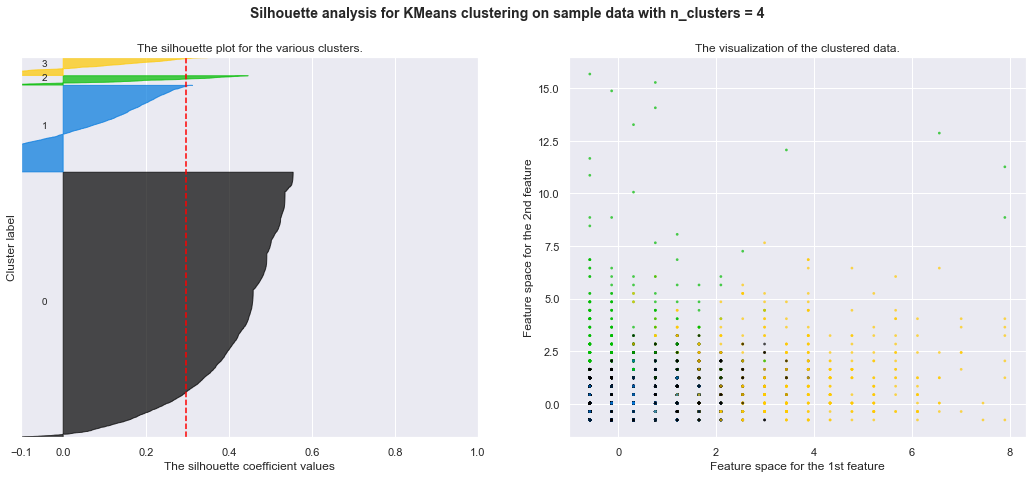

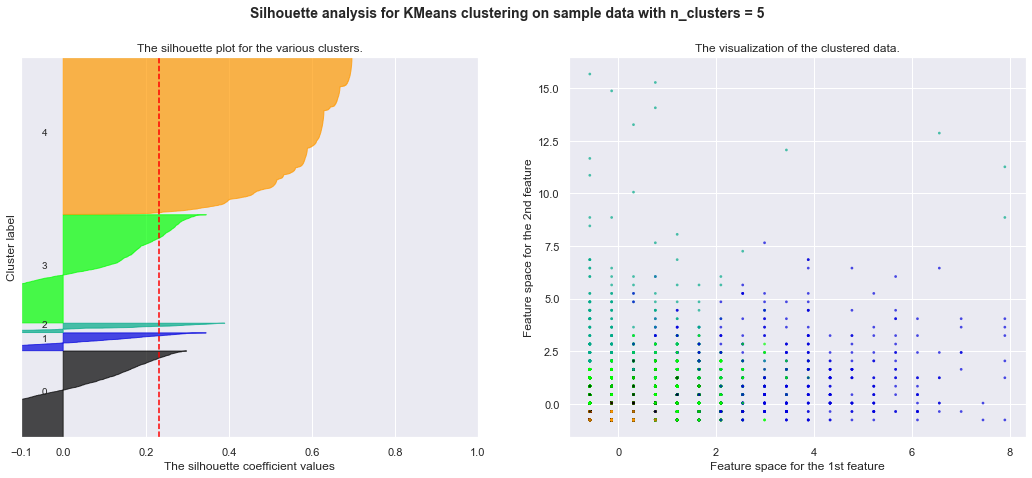

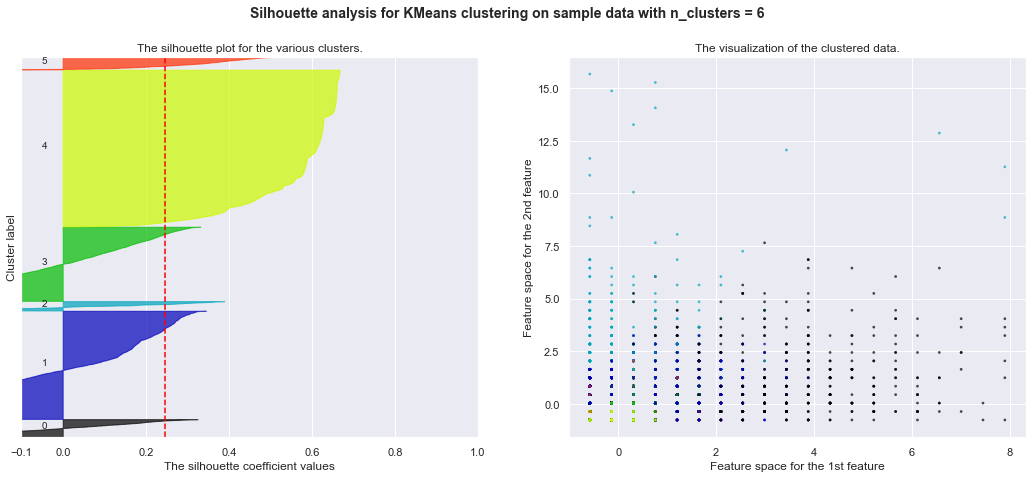

In [35]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
range_n_clusters = [4,5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusters = AgglomerativeClustering(#affinity='precomputed', 
    #affinity='mahalanobis',
        n_clusters=n_clusters, linkage='ward')

    cluster_labels = clusters.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 1], X[:, 2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 1], centers[:, 2], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[1], c[2], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [181]:
# silhouette_avg = silhouette_score(X,labels_all )
# print(silhouette_avg)                          

In [61]:
data_55. info()
data_55.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11965 entries, 0 to 12121
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   portal_view    11965 non-null  float64
 1   q              11965 non-null  int64  
 2   no_vocab       11965 non-null  int64  
 3   q_len_ave      11965 non-null  float64
 4   session_len_s  11965 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 560.9 KB


,portal_view,q,no_vocab,q_len_ave,session_len_s
0,2.0,1,1,1.000000,0.833333
1,10.0,3,1,1.000000,24.550000
2,3.0,6,9,2.833333,19.033333
3,3.0,1,2,2.000000,2.300000
4,4.0,1,2,2.000000,10.283333


In [62]:
data_5_['advance_search_1']=np.where(data_5_['Advance_search']==True, 1, 0)
data_5_.head()
data_5_vis= data_5_[['session_no',
    'portal_search', 
                    'portal_view', 
                 'portal_accessed', 'portal_export', 
                 'q',
    'no_vocab', 'no_word', 'session_len_s', 'browse_q_ratio',
    #'label_Dbscan_1',
#                     'session_type',
     'v_w_ratio','q_len_ave',
                    'ARDC', 'Browse_other',
                    'Search_engine',
                     'advance_search_1',
                    'distance_0']]


data_5_vis['label']=labels_all
data_5_vis.info()
data_5_vis.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11965 entries, 0 to 12121
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   session_no        11965 non-null  int64  
 1   portal_search     11965 non-null  float64
 2   portal_view       11965 non-null  float64
 3   portal_accessed   11965 non-null  float64
 4   portal_export     11965 non-null  float64
 5   q                 11965 non-null  int64  
 6   no_vocab          11965 non-null  int64  
 7   no_word           11965 non-null  int64  
 8   session_len_s     11965 non-null  float64
 9   browse_q_ratio    11965 non-null  float64
 10  v_w_ratio         11965 non-null  float64
 11  q_len_ave         11965 non-null  float64
 12  ARDC              11965 non-null  int64  
 13  Browse_other      11965 non-null  int64  
 14  Search_engine     11965 non-null  int64  
 15  advance_search_1  11965 non-null  int32  
 16  distance_0        7873 non-null   float6

C:\Users\Romina\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,session_no,portal_search,portal_view,portal_accessed,portal_export,q,no_vocab,no_word,session_len_s,browse_q_ratio,v_w_ratio,q_len_ave,ARDC,Browse_other,Search_engine,advance_search_1,distance_0,label
0,32,1.0,2.0,0.0,0.0,1,1,1,0.833333,2.000000,1.000000,1.000000,0,0,1,0,NaN,4
1,213,5.0,10.0,0.0,0.0,3,1,3,24.550000,3.333333,0.333333,1.000000,0,0,1,0,NaN,5
2,227,6.0,3.0,0.0,0.0,6,9,17,19.033333,0.500000,0.529412,2.833333,0,0,1,1,inf,0
3,251,1.0,3.0,1.0,0.0,1,2,2,2.300000,3.000000,1.000000,2.000000,0,0,1,0,1.00327,4
4,254,1.0,4.0,1.0,0.0,1,2,2,10.283333,4.000000,1.000000,2.000000,0,0,1,0,NaN,3


In [63]:
#data_5_vis.to_csv("data_5_vis_v2.csv")
profile=data_5.agg({#'label':'count',
                                                  'ARDC':'sum',
                                                  'Browse_other':'sum',
                                                  'Search_engine':'sum',
                                                  #'session_type':'count',
                                                    'portal_search':'std',
                                                     'portal_view':'std',
                                                  'portal_accessed':'std',
                                                  'portal_export':'std',
    'q':'std',
                                                  'no_word':'std',
                                                  'no_vocab':'std',
                                          'v_w_ratio':'std',
                                          'browse_q_ratio':'std',
                                         'q_len_ave': 'std',
                                        'session_len_s':'std'})
print(profile)

ARDC                1290.000000
Browse_other         493.000000
Search_engine      10339.000000
portal_search          3.357780
portal_view            2.045775
portal_accessed        0.770247
portal_export          0.110758
q                      2.230899
no_word                7.415491
no_vocab               2.490200
v_w_ratio              0.292614
browse_q_ratio         1.314885
q_len_ave              1.845400
session_len_s          5.354573
dtype: float64


In [64]:
profile=data_5_vis.groupby('label').agg({'label':'count',
                                                  'ARDC':'sum',
                                                  'Browse_other':'sum',
                                                  'Search_engine':'sum',
                                                  #'session_type':'count',
                                                    'portal_search':'mean',
                                                     'portal_view':'mean',
                                                  'portal_accessed':'mean',
                                                  'portal_export':'mean',
                                                  'q':'mean',
                                                  'no_word':'mean',
                                                  'no_vocab':'mean',
                                          'v_w_ratio': 'mean',
                                          'browse_q_ratio': 'mean',
                                         'q_len_ave': 'mean',
                                        'session_len_s':'mean',
                                        'advance_search_1':'sum'})
profile

,label,ARDC,Browse_other,Search_engine,portal_search,portal_view,portal_accessed,portal_export,q,no_word,no_vocab,v_w_ratio,browse_q_ratio,q_len_ave,session_len_s,advance_search_1
label,,,,,,,,,,,,,,,,
0,563,107,39,417,11.191829,5.863233,1.067496,0.014210,9.207815,22.357016,5.717584,0.309417,1.122602,2.488294,12.627353,21
1,3418,356,147,2915,3.088941,2.020772,0.232007,0.004389,2.630486,7.279988,4.075190,0.700460,1.150576,3.163959,2.959747,60
2,295,67,17,211,3.566102,2.667797,0.247458,0.016949,2.905085,23.766102,11.528814,0.631743,1.431995,9.557660,6.342034,15
3,2343,211,98,2034,2.850619,4.141699,0.650021,0.006402,1.964575,3.637217,2.112249,0.760220,2.717793,1.735335,6.526191,8
4,4957,477,162,4318,1.691346,1.745007,0.144442,0.002219,1.386524,2.135162,1.621142,0.870639,1.470295,1.530462,1.726192,2
5,389,54,23,312,4.005141,4.493573,0.791774,0.015424,2.511568,5.506427,2.935733,0.673250,2.422888,2.321343,22.817438,3


In [65]:
data_5_dist=data_5_vis.replace([np.inf, -np.inf], np.nan)

means= data_5_dist.groupby('label')['distance_0'].mean()
means

label
0    1.142368
1    1.113727
2    0.980442
3    1.159613
4    1.190241
5    1.154424
Name: distance_0, dtype: float64

In [66]:
data_5_vis.to_csv("sessionswithLables.csv")

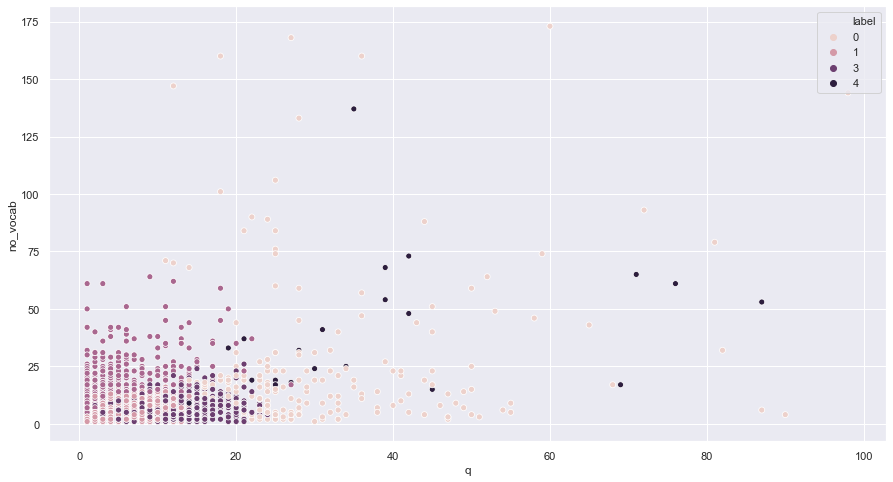

In [49]:
import seaborn as sns; sns.set()  # for plot styling
plt.figure(figsize=(15,8))
#ax = sns.scatterplot(x='portal_view', y='q',hue='label', size='session_type',data=data_5_)
#ab = sns.scatterplot(x='portal_view', y='no_word',hue='label', size='session_type',data=data_5_)
#ac = sns.scatterplot(x='q', y='session_len_s',hue='label_Dbscan_1', size='session_type', data=data_5_)
ad = sns.scatterplot(x='q', y='no_vocab', hue='label',data=data_5_vis)

#sns.pairplot(data_5_[['portal_view','q', 'label']], hue = 'label')

In [ ]:
# this section tries the new uncorelated features with Hierarchical clustering

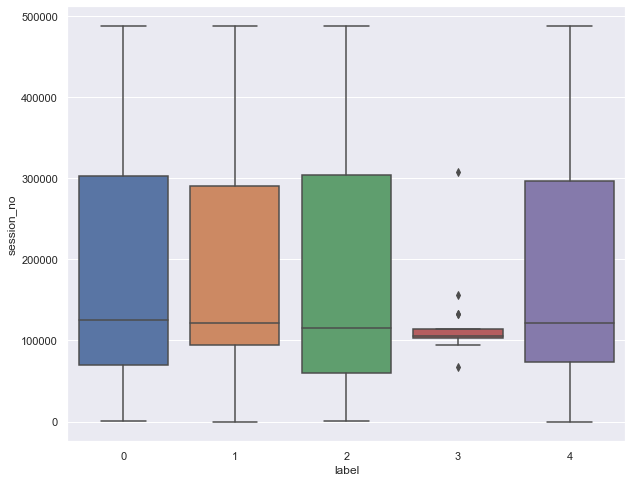

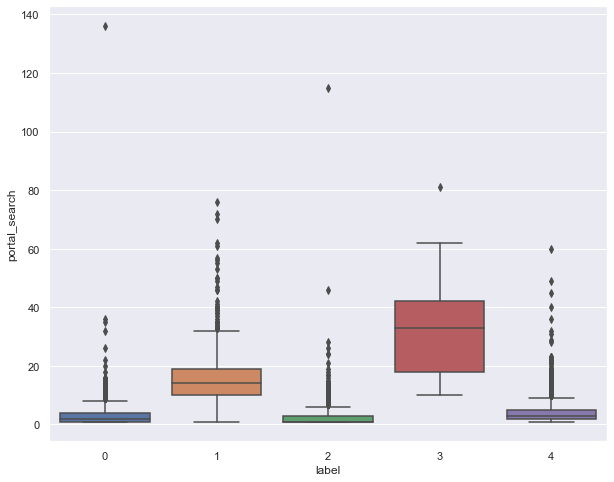

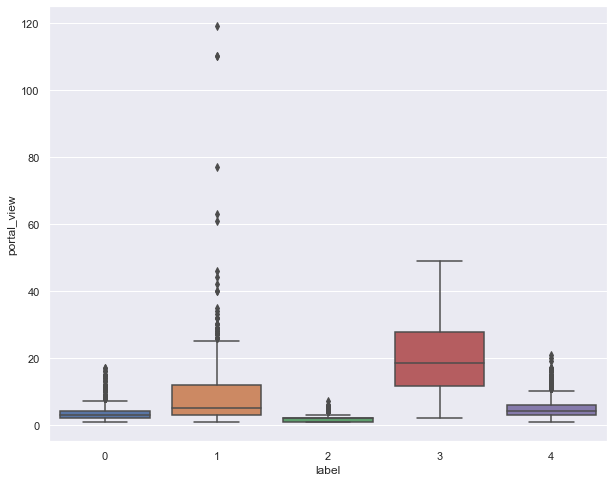

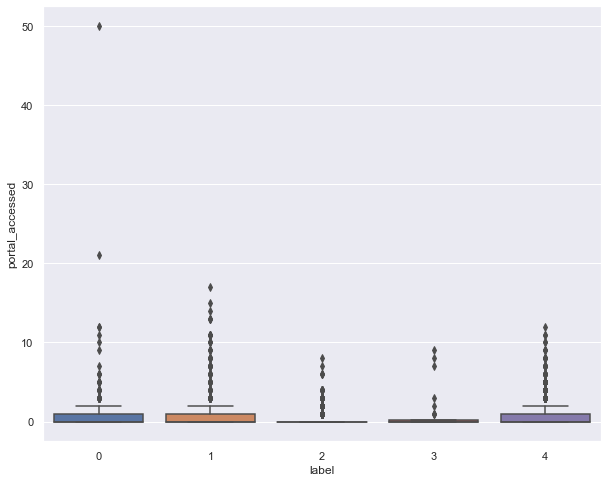

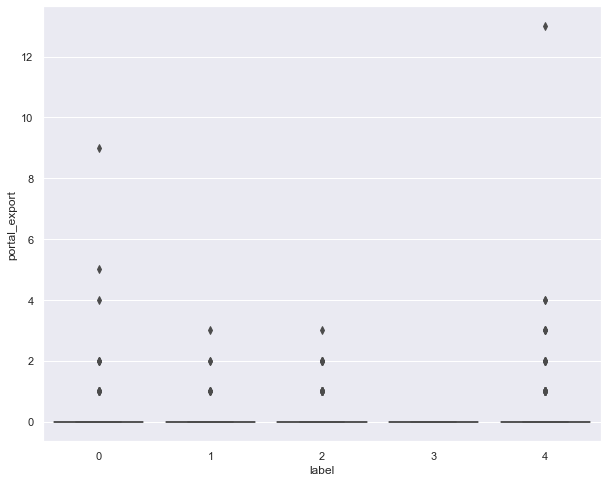

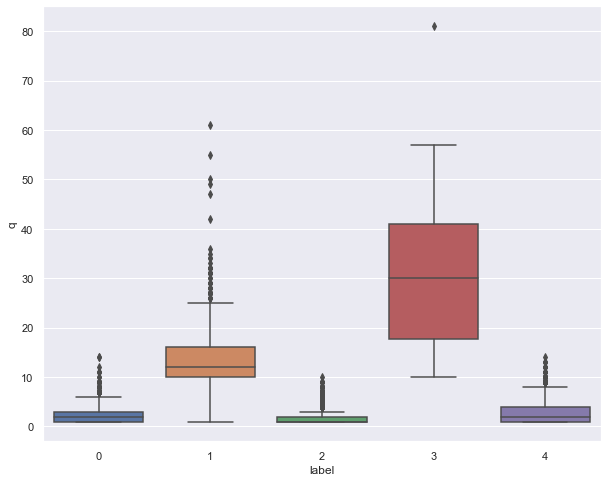

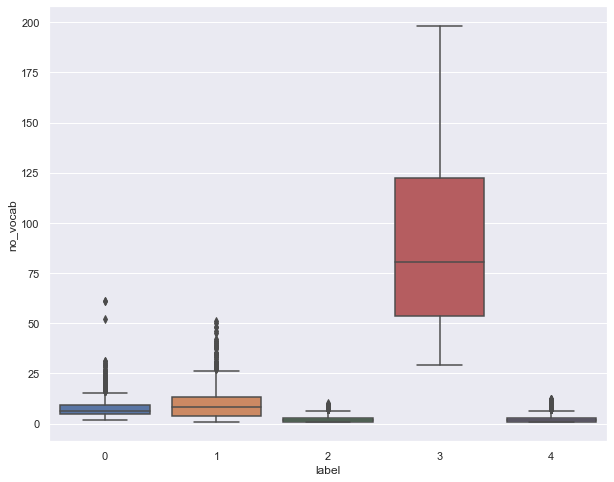

In [27]:
for i in range(0,7,1):
    plt.figure(figsize=(10,8))
    #Visualizing the data - displot
    y=data_5_vis.columns[i]
    #print(y)
    sns.boxplot(x=data_5_vis['label'], y=data_5_vis[y])
    plt.ylabel(data_5_vis.columns[i])
    #plt.show()

[Text(0.5, 0, 'Cluster label'), Text(0, 0.5, 'Number of query')]

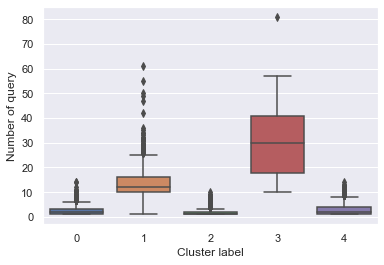

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.boxplot(x="label", y="q", data=data_5_vis)
ax.set(xlabel='Cluster label', ylabel='Number of query')
#ax = sns.swarmplot(x="label", y="q", data=data_5_vis, color=".25")

[Text(0.5, 0, 'Cluster label'), Text(0, 0.5, 'Number of views')]

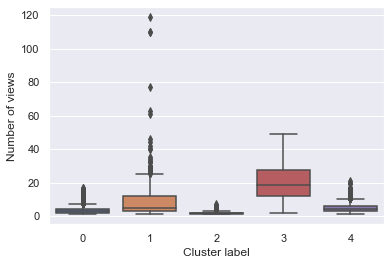

In [29]:
ax = sns.boxplot(x="label", y="portal_view", data=data_5_vis)
ax.set(xlabel='Cluster label', ylabel='Number of views')

In [ ]:
  'v_w_ratio': 'mean',
                                          'browse_q_ratio': 'mean',
                                         'q_len_ave': 'mean',
                                        'session_len_s':'mean'}

[Text(0.5, 0, 'Cluster label'), Text(0, 0.5, 'Average Length of query')]

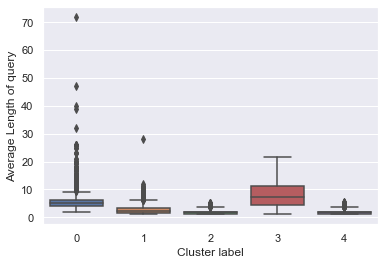

In [30]:
ax = sns.boxplot(x="label", y="q_len_ave", data=data_5_vis)
ax.set(xlabel='Cluster label', ylabel='Average Length of query')

[Text(0.5, 0, 'Cluster label'), Text(0, 0.5, 'Browse to query ratio')]

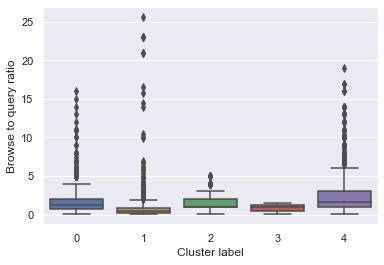

In [31]:
ax = sns.boxplot(x="label", y="browse_q_ratio", data=data_5_vis)
ax.set(xlabel='Cluster label', ylabel='Browse to query ratio')

[Text(0.5, 0, 'Cluster label'), Text(0, 0.5, 'Session Length(mins)')]

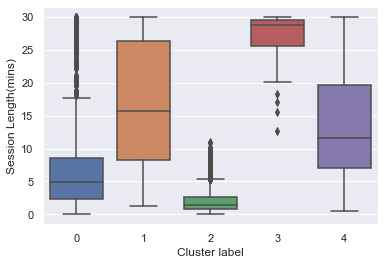

In [32]:
ax = sns.boxplot(x="label", y="session_len_s", data=data_5_vis)
ax.set(xlabel='Cluster label', ylabel='Session Length(mins)')

[Text(0.5, 0, 'Cluster label'), Text(0, 0.5, 'Number of tokens')]

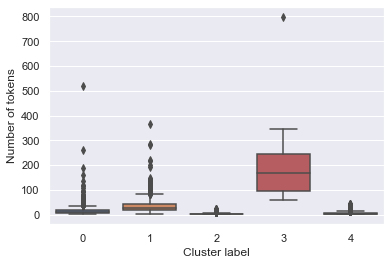

In [34]:
ax = sns.boxplot(x="label", y="no_word", data=data_5_vis)
ax.set(xlabel='Cluster label', ylabel='Number of tokens')

[Text(0.5, 0, 'Cluster label'), Text(0, 0.5, 'Number of unique vocabulary')]

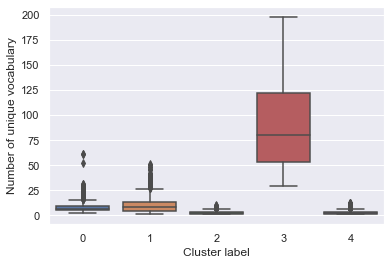

In [35]:
ax = sns.boxplot(x="label", y="no_vocab", data=data_5_vis)
ax.set(xlabel='Cluster label', ylabel='Number of unique vocabulary')

[Text(0.5, 0, 'Cluster label'),
 Text(0, 0.5, 'Unique vocabulary to token ratio')]

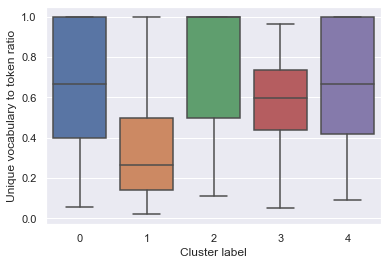

In [36]:
ax = sns.boxplot(x="label", y="v_w_ratio", data=data_5_vis)
ax.set(xlabel='Cluster label', ylabel='Unique vocabulary to token ratio')

[Text(0.5, 0, 'Cluster label'), Text(0, 0.5, 'Query- top result distance')]

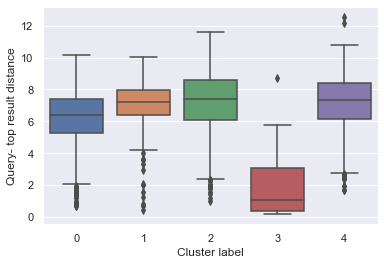

In [37]:
ax = sns.boxplot(x="label", y="distance_0", data=data_5_dist)
ax.set(xlabel='Cluster label', ylabel='Query- top result distance')